In [4]:
#importing libraries

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data= pd.read_csv("crime_data.csv")
# data

In [9]:
data.rename(columns={'Unnamed: 0':'Country'},inplace=True)
data.head()

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
data.isnull().sum().sum()

0

In [12]:
data1=data.iloc[:,1:]

In [14]:
array=data1.values
# array

In [ ]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [17]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [18]:
clusters =dbscan.labels_
clusters

# -1 is noisy samples

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [19]:
data['Clusters']=clusters

In [21]:
# data

In [22]:
data['Clusters'].value_counts()

-1    33
 0    17
Name: Clusters, dtype: int64

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [25]:
data2 = pd.read_csv("crime_data.csv")
# data2

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale = StandardScaler()
scaled_data2 = scale.fit_transform(crime.iloc[:,1:])

In [30]:
# scaled_data2

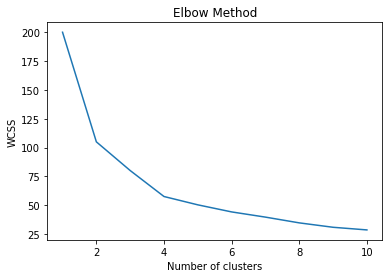

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
from sklearn.cluster import KMeans

In [33]:
clust = KMeans(4, random_state=52)
predicted_clust =clust.fit_predict(scaled_data2)

In [36]:
# predicted_clust

In [38]:
data2['clusterid_new'] = predicted_clust

In [40]:
# data2

In [41]:
cluster = pd.DataFrame(clust.cluster_centers_)
cluster

,0,1,2,3
0,-0.971303,-1.117836,-0.939550,-0.976578
1,0.702127,1.049994,0.729974,1.289904
2,1.426224,0.883211,-0.822791,0.019467
3,-0.494407,-0.386484,0.581676,-0.264310


In [42]:
c.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.815385,257.384615,76.000000,33.192308
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.656250,138.875000,73.875000,18.781250


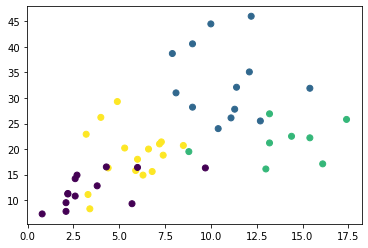

In [43]:
plt.scatter(data2.Murder,data2.Rape ,c=predicted_clust)

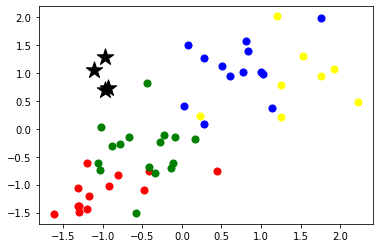

In [45]:
plt.scatter(scaled_data2[predicted_clust == 0,0],scaled_data2[predicted_clust== 0,1],s=50,color='red')
plt.scatter(scaled_data2[predicted_clust == 1,0],scaled_data2[predicted_clust== 1,1],s=50,color='blue')
plt.scatter(scaled_data2[predicted_clust == 2,0],scaled_data2[predicted_clust== 2,1],s=50,color='yellow')
plt.scatter(scaled_data2[predicted_clust == 3,0],scaled_data2[predicted_clust== 3,1],s=50,color='green')
plt.scatter(cluster[0][0],cluster[0][1],marker='*',s=300,color='black')
plt.scatter(cluster[1][0],cluster[1][1],marker='*',s=300,color='black')
plt.scatter(cluster[2][0],cluster[2][1],marker='*',s=300,color='black')
plt.scatter(cluster[3][0],cluster[3][1],marker='*',s=300,color='black')


plt.show()

In [46]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sn

In [47]:
data=pd.read_csv("crime_data.csv")
data.rename(columns={'Unnamed: 0':'Country'},inplace=True)
data.head(4)

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5


In [53]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [54]:
norm = norm_func(data.iloc[:,1:])
norm.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


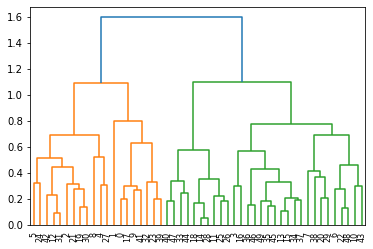

In [56]:
dendrogram = sch.dendrogram(sch.linkage(norm, method='complete'))

In [58]:
hierarchy = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [63]:
hc = hierarchy.fit_predict(norm)
hc
clusters=pd.DataFrame(hc,columns=['Clusters'])
# clusters

In [64]:
data['Clusters']=clusters

In [66]:
# data

In [67]:
data.Clusters.value_counts()

1    20
3    12
2    10
0     8
Name: Clusters, dtype: int64

In [68]:
data.groupby(data.Clusters).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


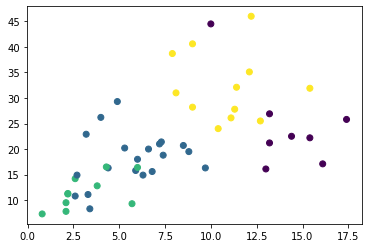

In [69]:
plt.scatter(data.Murder,data.Rape , c=hc)
 
plt.show()

In [70]:
data.iloc[:,1:].groupby(data.Clusters).mean()

,Murder,Assault,UrbanPop,Rape,Clusters
Clusters,,,,,
0,14.087500,252.750000,53.500000,24.5375,0.0
1,5.715000,132.300000,70.800000,18.1000,1.0
2,3.180000,78.700000,49.300000,11.6300,2.0
3,10.883333,256.916667,78.333333,32.2500,3.0
